In [2]:
from pathlib import Path
import matplotlib.pyplot as plt

## Setup workflow Tracing

In [5]:
from plantseg.tasks.workflow_handler import workflow_handler

workflow_handler.clean_dag()

print(f"Run-Inputs: {workflow_handler.dag.inputs}")
print(f"Tasks: {workflow_handler.dag.list_tasks}")

Run-Inputs: [{}]
Tasks: []


## 1 Import the input data

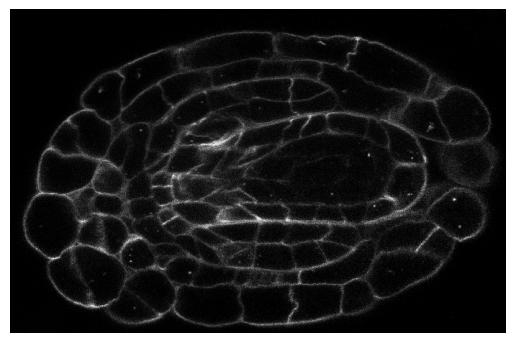

Run-Inputs: [{'input_path': PosixPath('/Users/locerr/data/I2K2024_plantseg_testdata/tiny_2D/ovule_sample_2D.tiff')}]
Tasks: [Task(func='import_image_task', images_inputs={'input_path': 'input_path'}, parameters={'semantic_type': 'raw', 'stack_layout': 'YX', 'image_name': None, 'key': 'raw', 'm_slicing': None}, outputs=['ovule_sample_2D_1e77e3bf-b3d0-441b-9ab1-1b9cc38d3e98'], node_type=<NodeType.ROOT: 'root'>, id=UUID('da43088f-f0aa-4914-956f-b1e640467db7'), skip=False)]


In [6]:
from plantseg.tasks.io_tasks import import_image_task

path = "/Users/locerr/data/I2K2024_plantseg_testdata/tiny_2D/ovule_sample_2D.tiff"
path = Path(path)

ps_image = import_image_task(input_path=path, semantic_type='raw', stack_layout="YX", key="raw")

plt.imshow(ps_image.get_data(), cmap="gray")
plt.axis("off")
plt.show()

print(f"Run-Inputs: {workflow_handler.dag.inputs}")
print(f"Tasks: {workflow_handler.dag.list_tasks}")

## Write a workflow

In [9]:
from plantseg.tasks.io_tasks import export_image_task
from plantseg.tasks.dataprocessing_tasks import gaussian_smoothing_task
from plantseg.tasks.prediction_tasks import unet_prediction_task
from plantseg.tasks.segmentation_tasks import dt_watershed_task, clustering_segmentation_task




## Export image and save the workflow

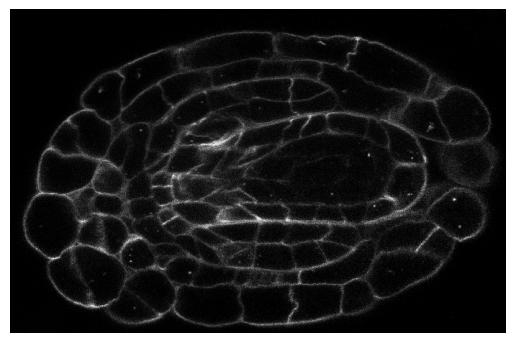

Run-Inputs: [{'input_path': PosixPath('/Users/locerr/data/I2K2024_plantseg_testdata/tiny_2D/ovule_sample_2D.tiff'), 'export_directory': './', 'name_pattern': '{file_name}_export', 'export_directory_0': './', 'name_pattern_0': '{file_name}_export', 'export_directory_1': './', 'name_pattern_1': '{file_name}_export'}]
Tasks: 
- func='import_image_task' images_inputs={'input_path': 'input_path'} parameters={'semantic_type': 'raw', 'stack_layout': 'YX', 'image_name': None, 'key': 'raw', 'm_slicing': None} outputs=['ovule_sample_2D_1e77e3bf-b3d0-441b-9ab1-1b9cc38d3e98'] node_type=<NodeType.ROOT: 'root'> id=UUID('da43088f-f0aa-4914-956f-b1e640467db7') skip=False
- func='export_image_task' images_inputs={'image': 'ovule_sample_2D_1e77e3bf-b3d0-441b-9ab1-1b9cc38d3e98', 'export_directory': 'export_directory', 'name_pattern': 'name_pattern'} parameters={'key': None, 'scale_to_origin': True, 'export_format': 'tiff', 'data_type': 'uint16'} outputs=[] node_type=<NodeType.LEAF: 'leaf'> id=UUID('8e82b

In [12]:
export_image_task(image=ps_image, export_directory="./", name_pattern='{file_name}_export')

plt.imshow(ps_image.get_data(), cmap="gray")
plt.axis("off")
plt.show()

workflow_handler.save_to_yaml(path="./custom_workflow.yaml")

print(f"Run-Inputs: {workflow_handler.dag.inputs}")
print("Tasks: ")
for task in workflow_handler.dag.list_tasks:
    print(f'- {task}')
